In [2]:
from osgeo import gdal

file_path = "/Users/kasirajan/Documents/ACF/Modeled Surfaces/Data/Raster/IA2020DHS_AHTOBCMANY_MS_v01/IA2020DHS_AHTOBCMANY_MS_CI_v01.tif"

dataset = gdal.Open(file_path)

if dataset:
    print("File loaded successfully!")
else:
    print("Error loading the file.")


File loaded successfully!


In [4]:
# Extracting metadata and data from the TIFF

cols = dataset.RasterXSize
rows = dataset.RasterYSize
bands = dataset.RasterCount

geotransform = dataset.GetGeoTransform()
projection = dataset.GetProjection()

band = dataset.GetRasterBand(1)
data = band.ReadAsArray(0, 0, cols, rows)

print(f"Raster Dimensions: {cols} cols x {rows} rows x {bands} bands")
print(f"Geotransform: {geotransform}")
print(f"Projection: {projection}")


Raster Dimensions: 702 cols x 690 rows x 1 bands
Geotransform: (68.1665674, 0.04166665, 0.0, 35.4999618, 0.0, -0.041666649999999986)
Projection: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


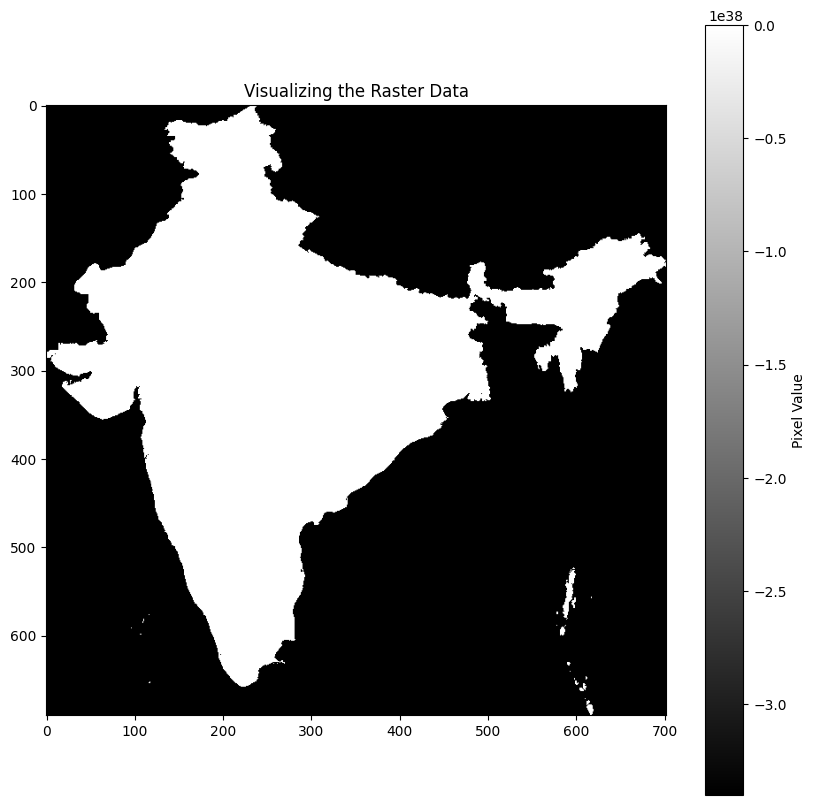

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray')  # Using grayscale for visualization
plt.colorbar(label="Pixel Value")
plt.title("Visualizing the Raster Data")
plt.show()


In [6]:
import numpy as np

nodata_value = -3.3999999521443642e+38
data[data == nodata_value] = np.nan


In [7]:
# Compute basic statistics of the raster data
mean_value = np.nanmean(data)
median_value = np.nanmedian(data)
std_dev = np.nanstd(data)
min_value = np.nanmin(data)
max_value = np.nanmax(data)

print(f"Mean Value: {mean_value}")
print(f"Median Value: {median_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")


Mean Value: 0.16634094715118408
Median Value: 0.16377843916416168
Standard Deviation: 0.0426706001162529
Min Value: 0.044329144060611725
Max Value: 0.42752689123153687


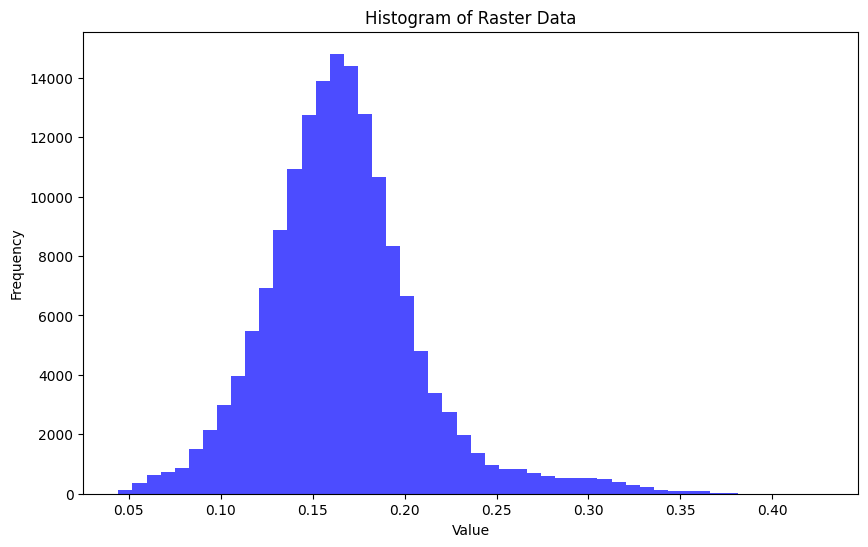

In [8]:
# Plotting the histogram of the raster data
plt.figure(figsize=(10, 6))
plt.hist(data[~np.isnan(data)], bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Raster Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [9]:
import pandas as pd
from osgeo import osr

def tif_to_csv(tiff_file, save_path, column_names=["long", "lat", "value"]):
   
    ds = gdal.Open(tiff_file)
    
  
    transform = ds.GetGeoTransform()
    raster_data = ds.GetRasterBand(1).ReadAsArray()
    
    
    x = np.linspace(transform[0], transform[0] + transform[1] * ds.RasterXSize, ds.RasterXSize)
    y = np.linspace(transform[3], transform[3] + transform[5] * ds.RasterYSize, ds.RasterYSize)
    
    x, y = np.meshgrid(x, y)
    
    # Convert the arrays to 1D and pair with the raster data
    df = pd.DataFrame({
        column_names[0]: x.ravel(),
        column_names[1]: y.ravel(),
        column_names[2]: raster_data.ravel()
    })
    
   
    df.to_csv(save_path, index=False)


csv_save_path = "/Users/kasirajan/Documents/ACF/Modeled Surfaces/Output/converted_data.csv"


tif_to_csv(file_path, csv_save_path)


In [10]:
import geopandas as gpd
from shapely.geometry import Point

def csv_to_geojson(csv_file, save_path):
    
    df = pd.read_csv(csv_file)
    
  
    geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    

    gdf.to_file(save_path, driver='GeoJSON')


geojson_save_path = "/Users/kasirajan/Documents/ACF/Modeled Surfaces/Output/converted_data.geojson"


csv_to_geojson("/Users/kasirajan/Documents/ACF/Modeled Surfaces/Output/converted_data.csv", geojson_save_path)


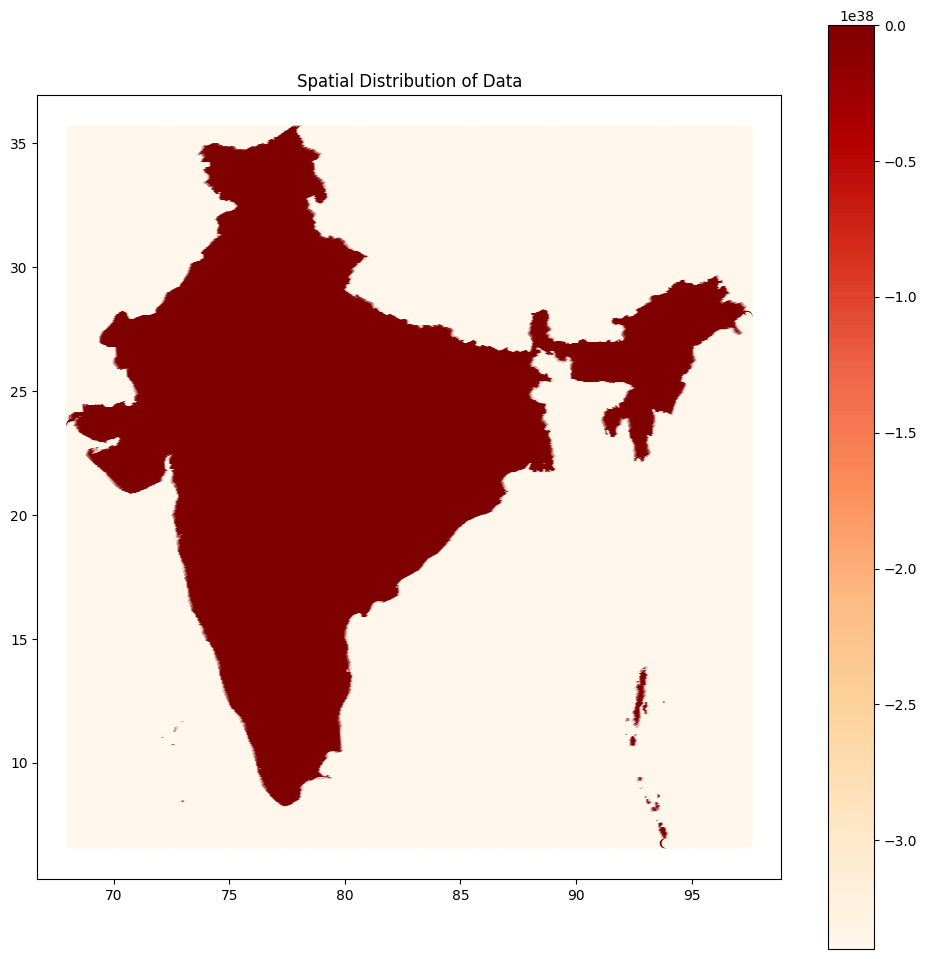

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

def visualize_geojson_on_map(geojson_path):
    
    gdf = gpd.read_file(geojson_path)
    
   
    fig, ax = plt.subplots(figsize=(12, 12))
    gdf.plot(column='value', ax=ax, legend=True, cmap='OrRd')
    ax.set_title('Spatial Distribution of Data')
    plt.show()


geojson_path = "/Users/kasirajan/Documents/ACF/Modeled Surfaces/Output/converted_data.geojson"


visualize_geojson_on_map(geojson_path)


In [12]:
import geopandas as gpd


gdf = gpd.read_file('/Users/kasirajan/Documents/ACF/Modeled Surfaces/Data/Shapefile/geoBoundaries-IND-ADM3.geojson')


column_names = gdf.columns


print(column_names)

Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')


In [13]:
import geopandas as gpd


gdf = gpd.read_file('/Users/kasirajan/Documents/ACF/Modeled Surfaces/Data/Shapefile/geoBoundaries-IND-ADM3.geojson')


is_muzaffarnagar_present = "Muzaffarnagar" in gdf["shapeName"].values


if is_muzaffarnagar_present:
    print("The value 'Muzaffarnagar' exists in the shapeName column.")
else:
    print("The value 'Muzaffarnagar' does not exist in the shapeName column.")

The value 'Muzaffarnagar' exists in the shapeName column.


In [14]:
import geopandas as gpd


gdf = gpd.read_file('/Users/kasirajan/Documents/ACF/Modeled Surfaces/Data/Shapefile/geoBoundaries-IND-ADM3.geojson')


muzaffarnagar_polygon = gdf[gdf['shapeName'] == 'Muzaffarnagar']


muzaffarnagar_polygon.to_file('/Users/kasirajan/Documents/ACF/Modeled Surfaces/Output/muzaffarnagar_boundary.geojson', driver='GeoJSON')

In [15]:
def extract_boundary_bbox(geojson_path):
    
    district_gdf = gpd.read_file(geojson_path)
    
  
    bbox = district_gdf.total_bounds
    
    return bbox

# Extract the bounding box for Muzaffarnagar
muzaffarnagar_bbox = extract_boundary_bbox("/Users/kasirajan/Documents/ACF/Modeled Surfaces/Output/muzaffarnagar_boundary.geojson")
muzaffarnagar_bbox


array([77.47625874, 29.36941234, 77.989151  , 29.709242  ])

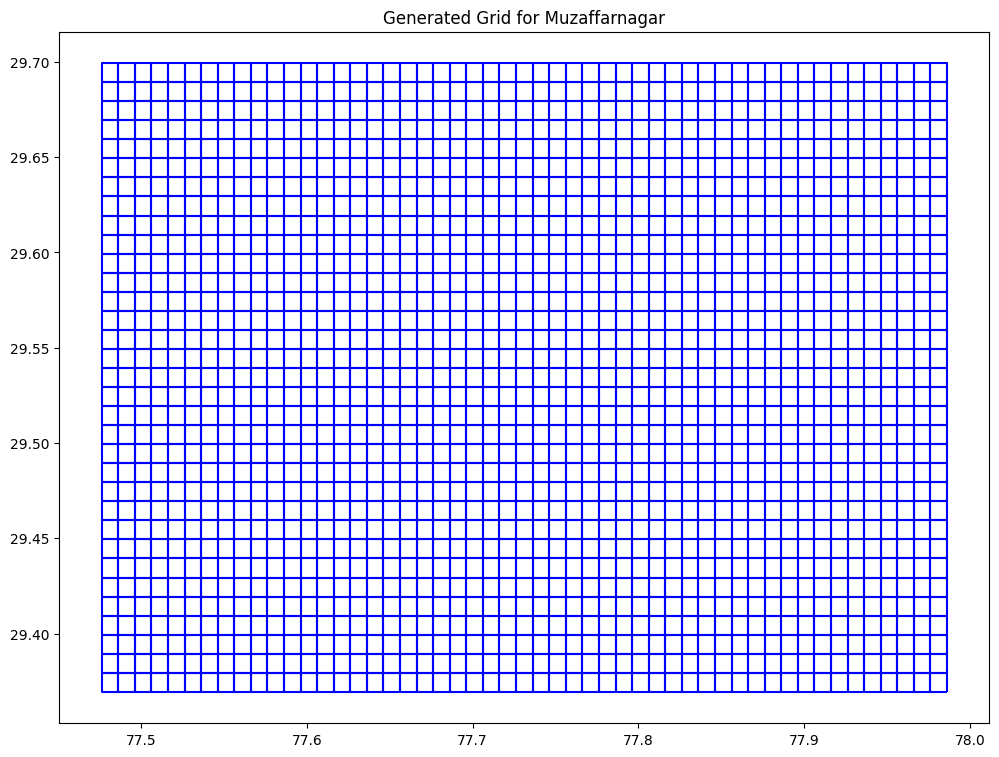

In [16]:
from shapely.geometry import box
import geopandas as gpd
import matplotlib.pyplot as plt

def build_grid(boundary, grid_size):
    """
    Build a grid of polygons within a given boundary.
    
    Parameters:
    - boundary: The bounding box (minx, miny, maxx, maxy)
    - grid_size: The size of each grid cell
    
    Returns:
    - A GeoDataFrame of polygons
    """
    minx, miny, maxx, maxy = boundary
    nx = int((maxx - minx) / grid_size)
    ny = int((maxy - miny) / grid_size)
    
    grid = []
    for i in range(ny):
        for j in range(nx):
            grid.append(box(minx + j * grid_size, miny + i * grid_size, 
                            minx + (j + 1) * grid_size, miny + (i + 1) * grid_size))
    
    return gpd.GeoDataFrame(geometry=grid, crs="EPSG:4326")

# Specify the grid size (you can adjust this value if needed)
grid_size = 0.01

# Build the grid for Muzaffarnagar using the provided bounding box
muzaffarnagar_grid_gdf = build_grid(muzaffarnagar_bbox, grid_size)


fig, ax = plt.subplots(figsize=(12, 12))
muzaffarnagar_grid_gdf.boundary.plot(ax=ax, color='blue')
plt.title('Generated Grid for Muzaffarnagar')
plt.show()


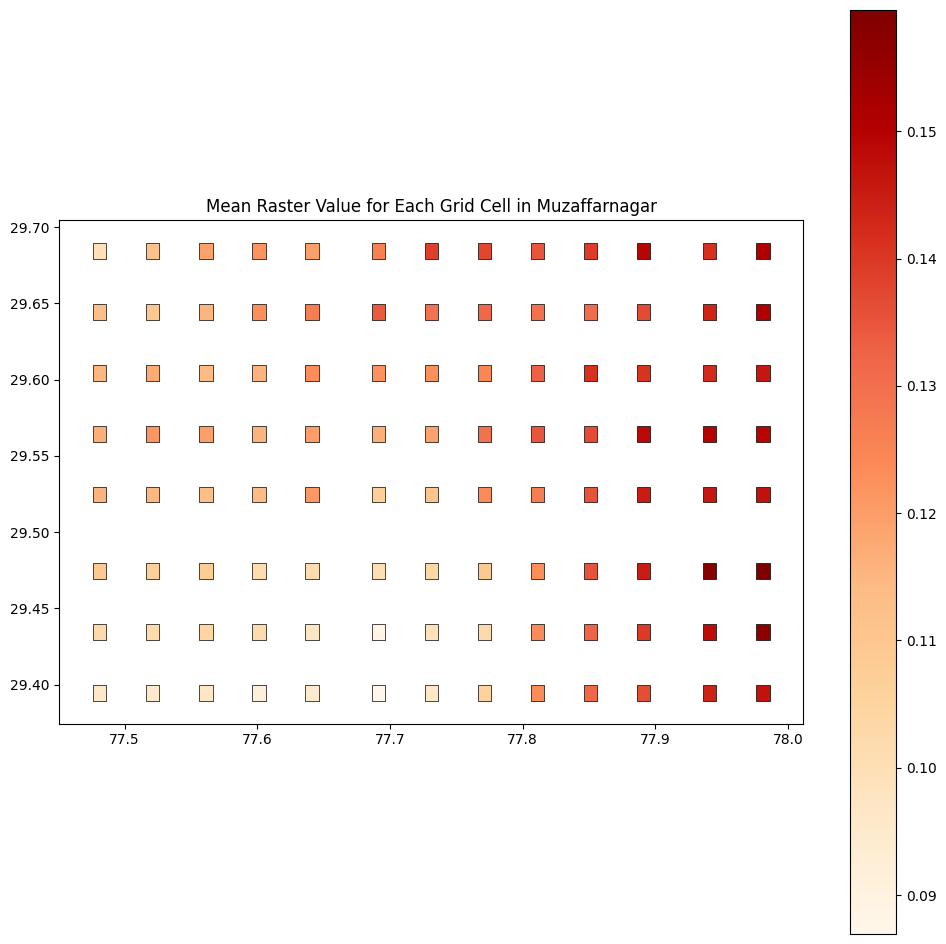

In [17]:
from rasterstats import zonal_stats

def calculate_zonal_mean(grid_gdf, tiff_file):
   
    stats = zonal_stats(grid_gdf, tiff_file, stats="mean", nodata=-3.400000e+38)
    
   
    grid_gdf['mean_value'] = [x['mean'] for x in stats]
    
    return grid_gdf

# Calculate mean value for each grid cell
muzaffarnagar_grid_with_mean = calculate_zonal_mean(muzaffarnagar_grid_gdf, file_path)


fig, ax = plt.subplots(figsize=(12, 12))
muzaffarnagar_grid_with_mean.plot(column='mean_value', ax=ax, legend=True, cmap='OrRd', edgecolor='black', linewidth=0.5)
plt.title('Mean Raster Value for Each Grid Cell in Muzaffarnagar')
plt.show()


In [18]:
import folium

def visualize_on_osm(grid_gdf):
   
    grid_json = grid_gdf.to_json()
    
    
    center = [grid_gdf['geometry'].centroid.y.mean(), grid_gdf['geometry'].centroid.x.mean()]
    
   
    m = folium.Map(location=center, zoom_start=10, tiles="OpenStreetMap")
    
   
    folium.GeoJson(
        grid_json,
        name='Grid',
        style_function=lambda x: {
            'fillColor': 'red',
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.6
        }
    ).add_to(m)
    
   
    return m


muzaffarnagar_map = visualize_on_osm(muzaffarnagar_grid_with_mean)
muzaffarnagar_map


/var/folders/3s/p_nc56qx29b3_fs609jrmyg80000gq/T/ipykernel_22631/3409333297.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [grid_gdf['geometry'].centroid.y.mean(), grid_gdf['geometry'].centroid.x.mean()]


In [20]:
def classify_values(values, n_classes=4):
    """
    Classify the values into intervals based on quantiles.
    
    Parameters:
    - values: A series of numeric values.
    - n_classes: Number of classes to divide the values into.
    
    Returns:
    - A series of class labels.
    """
    # Determine the breaks based on quantiles
    breaks = [values.quantile(q=i/n_classes) for i in range(1, n_classes)]
    classified_vals = pd.cut(values, bins=[-float("inf")] + breaks + [float("inf")], labels=list(range(n_classes)))
    
    return classified_vals


In [22]:
import branca.colormap as cm

def visualize_on_osm_with_classes(grid_gdf):
    # Filter out NaN values
    grid_gdf = grid_gdf.dropna(subset=['mean_value'])
    
    # Classify the mean values
    grid_gdf['class'] = classify_values(grid_gdf['mean_value'])
    
    # Convert GeoDataFrame to GeoJSON format for folium
    grid_json = grid_gdf.to_json()
    
  
    center = [grid_gdf['geometry'].centroid.y.mean(), grid_gdf['geometry'].centroid.x.mean()]
    
   
    colormap = cm.LinearColormap(colors=['green', 'yellow', 'orange', 'red'], index=grid_gdf['mean_value'].quantile([0.25, 0.5, 0.75]), vmin=grid_gdf['mean_value'].min(), vmax=grid_gdf['mean_value'].max())
    
   
    m = folium.Map(location=center, zoom_start=10, tiles="OpenStreetMap")
    
   
    folium.GeoJson(
        grid_json,
        name='Grid',
        style_function=lambda x: {
            'fillColor': colormap(x['properties']['mean_value']),
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=["mean_value"], aliases=["Mean Value:"])
    ).add_to(m)
    
    
    colormap.add_to(m)
    
    return m


muzaffarnagar_map_classified = visualize_on_osm_with_classes(muzaffarnagar_grid_with_mean)
muzaffarnagar_map_classified


/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/3s/p_nc56qx29b3_fs609jrmyg80000gq/T/ipykernel_22631/2785500067.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [grid_gdf['geometry'].centroid.y.mean(), grid_gdf['geometry'].centroid.x.mean()]
